In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
titanic_file_path = '/kaggle/input/titanic/train.csv'

titanic_data = pd.read_csv(titanic_file_path)

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First, I will make a list of all the columns so I can take a look at the correlation matrix for each of these elements.

In [3]:
columns = list(titanic_data.columns.values)
print(columns)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


With the elements listed, I now need to see which are numeric and which are categorical, which I can do with describe().

In [4]:
print(titanic_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Now I will need to review how each of the remaining elements are categorized to see if they, perhaps, can logically be split into larger groups for comparison.

In [5]:
categorical_subset = titanic_data[['Sex', 'Embarked', 'Ticket', 'Cabin']]

print(titanic_data.Sex.head(15))
print(titanic_data.Embarked.head(15))
print(titanic_data.Ticket.head(15))
print(titanic_data.Cabin.head(15))

0       male
1     female
2     female
3     female
4       male
5       male
6       male
7       male
8     female
9     female
10    female
11    female
12      male
13      male
14    female
Name: Sex, dtype: object
0     S
1     C
2     S
3     S
4     S
5     Q
6     S
7     S
8     S
9     C
10    S
11    S
12    S
13    S
14    S
Name: Embarked, dtype: object
0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object
0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object


In [6]:


print(titanic_data['Sex'].value_counts())
print(titanic_data['Embarked'].value_counts())
print(titanic_data['Ticket'].value_counts())
print(titanic_data['Cabin'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


In [7]:
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Clearly, Sex is an easily categorized variable, as is Embarked, since those contain a minimum number of possible responses. Those can be assigned dummy values as they are. Ticket does not have any immediately noticeable patterns, though there are occasional repeating letter patterns. Additional exploration would be necessary to use that variable.

Cabin provides an interesting possibility for consideration. The naming convension of the cabins indicates that they are separated into sections by letter. It is possible that certain sections were more deadly than others, regardless of Sex of Pclass. It is also notable that Cabin has the most null values in the data set by a large margin. Both of these facts deserve exploration.

In [8]:
import re

titanic_data['cabin_section'] = titanic_data['Cabin'].str.extract('([A-Z])', expand=True)
titanic_data['cabin_section'] = titanic_data[['cabin_section']].fillna(value = 'Unknown')

# pd.set_option("max_rows", None)

titanic_data['cabin_section'].head(20)
# titanic_data.Cabin.head

0     Unknown
1           C
2     Unknown
3           C
4     Unknown
5     Unknown
6           E
7     Unknown
8     Unknown
9     Unknown
10          G
11          C
12    Unknown
13    Unknown
14    Unknown
15    Unknown
16    Unknown
17    Unknown
18    Unknown
19    Unknown
Name: cabin_section, dtype: object

In [9]:
print(titanic_data['cabin_section'].value_counts())

Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: cabin_section, dtype: int64


I have altered the Cabin column to reflect the section of the ship where the cabin is located and turned this into a new variable cabin_section. I have also put NAN values into their own variable so they can be considered in the model. It is possible that this lack of information could constitute factors that might lead to surviving the disaster or not.

In [10]:
numerical_subset = titanic_data[['Pclass', 'Parch', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

categorical_subset = titanic_data[['Sex', 'Embarked', 'cabin_section']]
categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([numerical_subset, categorical_subset], axis=1)

In [11]:
# Find all correlations and sort 
correlations_data = features.corr()['Survived'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Sex_male                -0.543351
Pclass                  -0.338481
cabin_section_Unknown   -0.316912
Embarked_S              -0.155660
Age                     -0.077221
SibSp                   -0.035322
cabin_section_T         -0.026456
Embarked_Q               0.003650
cabin_section_G          0.016040
cabin_section_A          0.022287
cabin_section_F          0.057935
Parch                    0.081629
Parch                    0.081629
cabin_section_C          0.114652
cabin_section_E          0.145321
Name: Survived, dtype: float64 

cabin_section_T   -0.026456
Embarked_Q         0.003650
cabin_section_G    0.016040
cabin_section_A    0.022287
cabin_section_F    0.057935
Parch              0.081629
Parch              0.081629
cabin_section_C    0.114652
cabin_section_E    0.145321
cabin_section_D    0.150716
Embarked_C         0.168240
cabin_section_B    0.175095
Fare               0.257307
Sex_female         0.543351
Survived           1.000000
Name: Survived, dtype: float64


From the correlation matrix, we can see that Sex has the largest correlation with survivorship. Class appears to be negatively associated with survivorship, but this is due to the computer assigned class values a true numerical value, rather than its symbolic one it has in the real world. cabin_section_Unknown is also negatively associated with survivorship, suggesting that we might be right about that variable.

Fare also seems to have played a role, as it is positively associated with survivorhood. This seems like an extension of Pclass, but if so, why is the correlation reduced by roughly 8%? Perhaps it is thrown off by the crew that did not pay for the voyage? Or perhaps some wealthy people were guests on the ship and did not pay. Both are possible, so additional exploration is required.

We will start by looking at a bar chart of survival rates by cabin section.

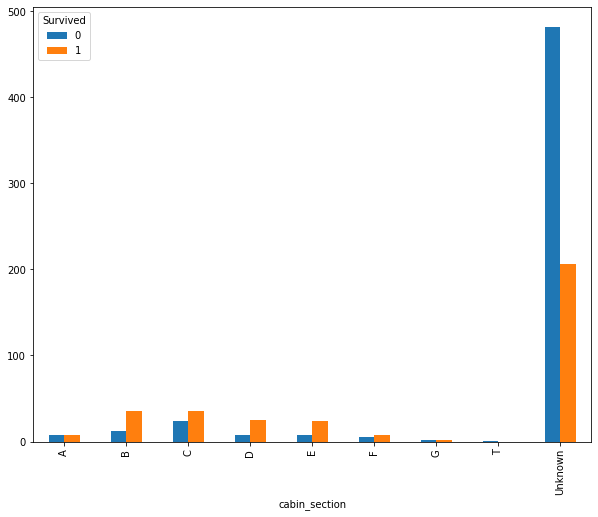

In [12]:
section_survival = titanic_data.groupby(['cabin_section'])['Survived'].value_counts().unstack().plot(figsize=(10, 8), kind='bar',stacked = False)

We can see here that survivor rates, with the exception of Sections A, G, and T, tend to be higher when the section is known. G and T seem to be fairly even, but not well represented.

Upon further research (https://titanic.fandom.com/wiki/A_Deck), it appears that there are a lot of unknown occupants of Deck A, which might be contributing to its unusual composition. From the occupants that are known, it seems that many of these particular occupants were unwilling to leave, either due to disbelief, fear of leaving the ship, or guilt at its sinking, rather than being willfully excluded from lifeboats.

Decks B and C https://titanic.fandom.com/wiki/B_Deck#:~:text=B%20Deck%2C%20also%20called%20the,featuring%20their%20own%20private%20promenades., https://titanic.fandom.com/wiki/C_Deck ), have a much higher proportion of known occupants than any other decks, so we can have a higher certainty that these proportions are fairly accurate.

G and F decks were entirely third class passengers and both of these decks were completely flooded within minutes of hitting the iceberg. Since there were 1,100 third class passengers, it appears that both G and F were full of Unknown status passengers.

Interestingly, E deck, despite being fairly low in the ship, had a comparatively high survival rate. Whether or not it played a part is uncertain, but we can note that a majority of the onboard crew were cabined on E deck (https://titanic.fandom.com/wiki/E_Deck ). It is possible that, despite a comparatively low status, their position of power on the ship afforded them a better chance of surviving.

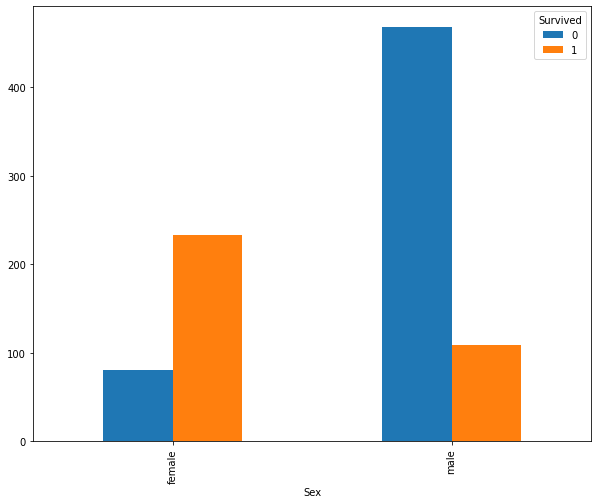

In [13]:
sex_survival = titanic_data.groupby(['Sex'])['Survived'].value_counts().unstack().plot(figsize=(10, 8), kind='bar',stacked = False)

The difference between the survivorship of the sexes is highly significant, though unsurprising. The phrase "women and children first" seemed to have been a guiding cultural principle for those onboard, though it was clearly not absolute, as certain men were considered exceptions.

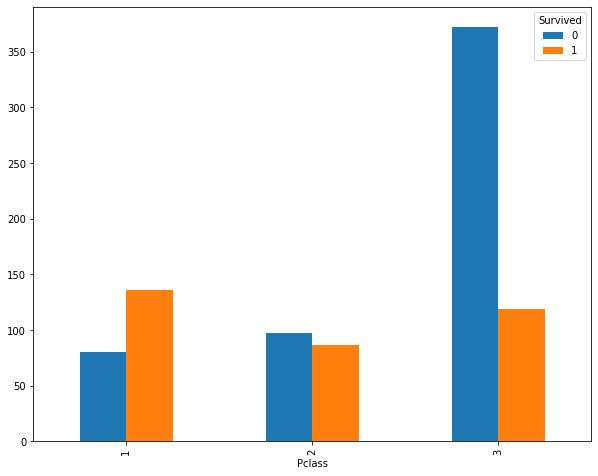

In [14]:
class_survival = titanic_data.groupby(['Pclass'])['Survived'].value_counts().unstack().plot(figsize=(10, 8), kind='bar',stacked = False)

The most significant piece of this graph is the likelihood of a third class passenger surviving, which was significantly lower than the other classes. As seen in the section examination above, part of this had to do with how quickly third class decks flooded. Many people on these decks simply did not have time to escape. The facts of the night make it clear, though, that this is not the only reason, as many third class passengers were denied access to lifeboats.

We may have a better approximation of the true significance by examining the difference between first and second class passengers, who were both on sections that flooded more slowly. Here, we can see that the difference is still stark, but not quite so extreme as with third class. Still, class exclusion becomes harsher as class level is lowered, so the answer is most likely somewhere in the middle.

In [15]:
#import seaborn as sns
#sns.set(font_scale = 2)
#import matplotlib.pyplot as plt
#%matplotlib inline

#cabin_encode = pd.get_dummies(titanic_data[['cabin_section']])
#some_features = titanic_data[['Fare', 'Survived']]

#features = pd.concat([some_features, cabin_encode], axis=1)

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
#sns.lmplot('Fare', 'cabin_section', 
#          hue = 'Survived', data = features,
#          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
#          size = 12, aspect = 1.2);

# Plot labeling
#plt.xlabel("Fare", size = 28)
#plt.ylabel('Deck', size = 28)
#plt.title('Class and Cabin Compared With Survival', size = 36);

(This was an attempt to make use of a scatterplot, but this particular type of representation does not seem to serve our model, regardless of how it is changed. I may return to it later.)

In [16]:
numerical_subset = titanic_data[['Pclass', 'Fare']]

categorical_subset = titanic_data[['Sex', 'cabin_section', 'Embarked']]
categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([numerical_subset, categorical_subset], axis=1)

X = features

print(X.describe)

<bound method NDFrame.describe of      Pclass     Fare  Sex_female  Sex_male  cabin_section_A  cabin_section_B  \
0         3   7.2500           0         1                0                0   
1         1  71.2833           1         0                0                0   
2         3   7.9250           1         0                0                0   
3         1  53.1000           1         0                0                0   
4         3   8.0500           0         1                0                0   
..      ...      ...         ...       ...              ...              ...   
886       2  13.0000           0         1                0                0   
887       1  30.0000           1         0                0                1   
888       3  23.4500           1         0                0                0   
889       1  30.0000           0         1                0                0   
890       3   7.7500           0         1                0                0   

     

In [17]:
y = titanic_data.Survived

In [18]:
# Data Prep
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Potential Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Testing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Final model decision
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

After importing necessary libraries, we split the data into a training and test set.

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 13)

Imputing the missing values of Age and Embark.

In [20]:
imputer = SimpleImputer(strategy='median')

imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_val = imputer.transform(X_val)

In [21]:
print('Missing values in training features: ', np.sum(np.isnan(X_train)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_val)))

Missing values in training features:  0
Missing values in testing features:   0


In [22]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_val)

In [23]:
# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_val = np.array(y_val).reshape((-1, ))

In [24]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_val)
    model_mae = mae(y_val, model_pred)
    
    # Return the performance metric
    return model_mae

In [25]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 3.6916


In [26]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 0.4275


In [27]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 0.5099


In [28]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 0.5336


In [29]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.4789


<Figure size 1440x720 with 0 Axes>

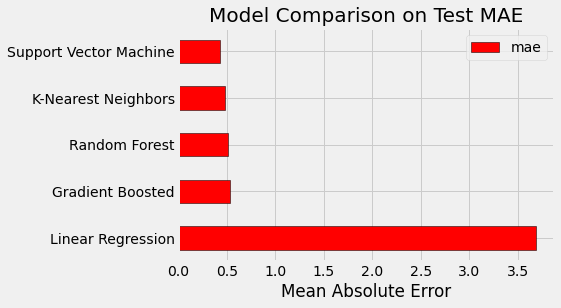

In [30]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10)) 


# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

In [31]:
# With the model design complete, use all the data for the final model.
random_forest.fit(X, y)

# Prepare Test Data
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

test_data['cabin_section'] = test_data['Cabin'].str.extract('([A-Z])', expand=True)
test_data['cabin_section'] = test_data[['cabin_section']].fillna(value = 'Unknown')

numerical_subset = test_data[['Pclass', 'Fare']]

categorical_subset = test_data[['Sex', 'cabin_section', 'Embarked']]
categorical_subset = pd.get_dummies(categorical_subset)

test_features = pd.concat([numerical_subset, categorical_subset], axis=1)

X_test = test_features

In [32]:
print('Missing values in training features: ', np.sum(np.isnan(X_test)))

Missing values in training features:  Pclass                   0
Fare                     1
Sex_female               0
Sex_male                 0
cabin_section_A          0
cabin_section_B          0
cabin_section_C          0
cabin_section_D          0
cabin_section_E          0
cabin_section_F          0
cabin_section_G          0
cabin_section_Unknown    0
Embarked_C               0
Embarked_Q               0
Embarked_S               0
dtype: int64


In [33]:
X_test[np.isnan(X_test)] = 0

print('Missing values in training features: ', np.sum(np.isnan(X_test)))

Missing values in training features:  Pclass                   0
Fare                     0
Sex_female               0
Sex_male                 0
cabin_section_A          0
cabin_section_B          0
cabin_section_C          0
cabin_section_D          0
cabin_section_E          0
cabin_section_F          0
cabin_section_G          0
cabin_section_Unknown    0
Embarked_C               0
Embarked_Q               0
Embarked_S               0
dtype: int64


In [34]:
print('X:')
X.describe()


X:


,Pclass,Fare,Sex_female,Sex_male,cabin_section_A,cabin_section_B,cabin_section_C,cabin_section_D,cabin_section_E,cabin_section_F,cabin_section_G,cabin_section_T,cabin_section_Unknown,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,32.204208,0.352413,0.647587,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044,0.188552,0.086420,0.722783
std,0.836071,49.693429,0.477990,0.477990,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.420397,0.391372,0.281141,0.447876
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,14.454200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
print('X_Test')
X_test.describe()

X_Test


,Pclass,Fare,Sex_female,Sex_male,cabin_section_A,cabin_section_B,cabin_section_C,cabin_section_D,cabin_section_E,cabin_section_F,cabin_section_G,cabin_section_Unknown,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,35.541956,0.363636,0.636364,0.016746,0.043062,0.083732,0.031100,0.021531,0.019139,0.002392,0.782297,0.244019,0.110048,0.645933
std,0.841838,55.867684,0.481622,0.481622,0.128474,0.203240,0.277317,0.173797,0.145320,0.137177,0.048912,0.413179,0.430019,0.313324,0.478803
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,14.454200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,31.471875,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
X_test.insert(11,'cabin_section_T','')
X_test['cabin_section_T'] = 0

In [37]:
print('X_Test')
X_test.describe()

X_Test


,Pclass,Fare,Sex_female,Sex_male,cabin_section_A,cabin_section_B,cabin_section_C,cabin_section_D,cabin_section_E,cabin_section_F,cabin_section_G,cabin_section_T,cabin_section_Unknown,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.0,418.000000,418.000000,418.000000,418.000000
mean,2.265550,35.541956,0.363636,0.636364,0.016746,0.043062,0.083732,0.031100,0.021531,0.019139,0.002392,0.0,0.782297,0.244019,0.110048,0.645933
std,0.841838,55.867684,0.481622,0.481622,0.128474,0.203240,0.277317,0.173797,0.145320,0.137177,0.048912,0.0,0.413179,0.430019,0.313324,0.478803
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000
50%,3.000000,14.454200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000
75%,3.000000,31.471875,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000
max,3.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [38]:
test_predictions = random_forest.predict(X_test).astype(int)

output = pd.DataFrame({'PassengerId' : test_data.PassengerId,
                   'Survived' : test_predictions})

output.to_csv('submission.csv',index=False)